In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
X = []
y = []
list_of_data = []
with open('ex1data2.txt' , 'r') as file :
    list_of_data.append(file.readlines())

In [111]:
for i in range(len(list_of_data[0])):
    temp = []
    temp.append(int(list_of_data[0][i].split(',')[0]))
    temp.append(int(list_of_data[0][i].split(',')[1]))
    X.append(temp)
    y.append(int(list_of_data[0][i].split(',')[2].strip()))

In [112]:
X = np.array(X)
y = np.array(y)

In [113]:
m = y.size

In [114]:
print('data set size = {}'.format(y.size))
print('shape of the X = {}'.format(X.shape))
print('shape of the y = {}'.format(y.shape))

data set size = 47
shape of the X = (47, 2)
shape of the y = (47,)


In [115]:
def feature_normalization(X):
    
    standard_deviation = np.std(X, axis= 0)
    mean = np.mean(X, axis= 0)
    X_normalized = (X - mean)/ standard_deviation
    
    return X_normalized

In [116]:
X_normalized = feature_normalization(X)

In [117]:
X = np.concatenate([np.ones(m).reshape(m, 1), X_normalized], axis= 1)

In [118]:
print("Shape of X is: {}".format(X.shape))

Shape of X is: (47, 3)


In [120]:
def cost_func_multi(X , y , theta):
    
    m = y.size
    
    J = 0
    h = np.dot(X , theta)
    J = ( 1 / (2 * m) * np.sum(np.square(h - y)))
    return J

In [126]:
theta = np.array([0, 0, 0])
J = cost_func_multi(X , y , theta)

In [131]:
print('The cost func with theta 0 , 0 , 0 is {:.4f}'.format(J))

The cost func with theta 0 , 0 , 0 is 65591548106.4574


In [167]:
def grad_dec_multi_var(X , y , theta , alpha , iteration ):
    
    m = y.size
    
    theta = theta.copy()
    
    new_J = []
    new_theta = []
    
    for i in range(iteration):
        
        theta = theta - ( alpha / m ) * ( np.dot( X , theta ) - y ).dot( X )
        
        new_theta.append(theta)
        
        J = cost_func_multi(X , y , theta)
        new_J.append(J)
        
    
    minimized_J = new_J[-1]
    
    best_thetas = new_theta[-1]
    
    return minimized_J , best_thetas , new_J

In [168]:
theta = np.zeros(3)
alpha = .02
iteration = 500

In [169]:
minimized_J , best_thetas , new_J = grad_dec_multi_var(X , y , theta , alpha , iteration )

In [170]:
print("Theta found by gradient descent: {:.4f}, {:.4f}, {:.4f}".format(best_thetas[0], best_thetas[1], best_thetas[2]))
print("Final cost value:  {:0.3f}".format(new_J[-1]))

Theta found by gradient descent: 340398.6945, 108749.5109, -5880.0828
Final cost value:  2043494705.173


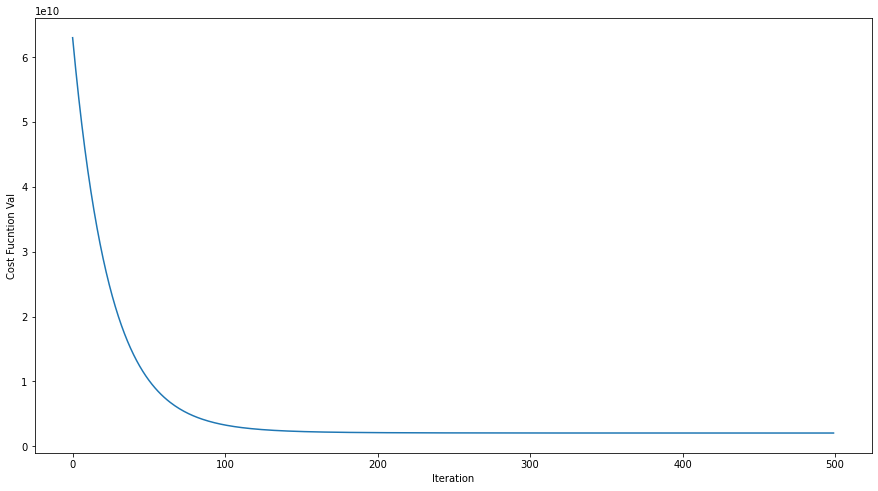

In [173]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = range(iteration) , y = new_J)
plt.xlabel('Iteration')
plt.ylabel('Cost Fucntion Val')
plt.show()

In [176]:
minimized_J , best_thetas , new_J = grad_dec_multi_var(X , y , theta , alpha = 0.02 , iteration = 500 )
minimized_J , best_thetas , new_J_1 = grad_dec_multi_var(X , y , theta , alpha = 0.1 , iteration = 10 )
minimized_J , best_thetas , new_J_2 = grad_dec_multi_var(X , y , theta , alpha = 0.01 , iteration = 100 )
minimized_J , best_thetas , new_J_3 = grad_dec_multi_var(X , y , theta , alpha = 0.2 , iteration = 200 )
minimized_J , best_thetas , new_J_4 = grad_dec_multi_var(X , y , theta , alpha = 0.02 , iteration = 300 )
minimized_J , best_thetas , new_J_5 = grad_dec_multi_var(X , y , theta , alpha = 0.3, iteration = 400 )
minimized_J , best_thetas , new_J_6 = grad_dec_multi_var(X , y , theta , alpha = 0.03, iteration = 500 )

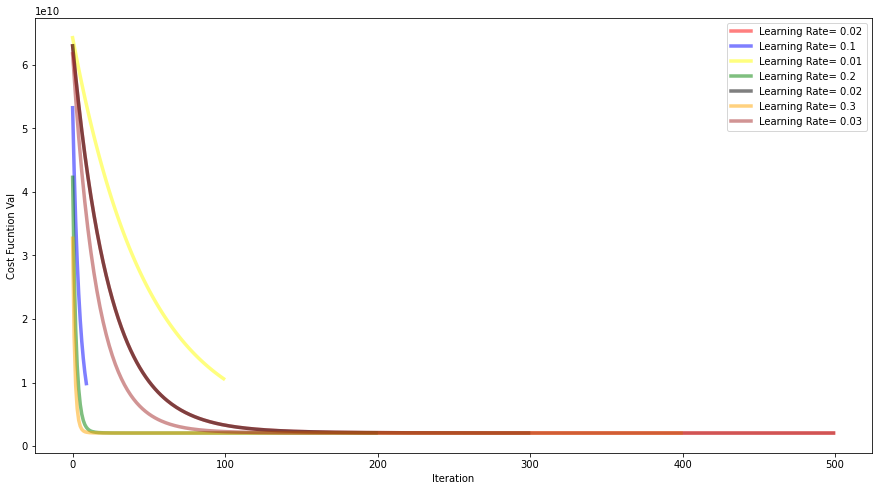

In [177]:
plt.figure(figsize=(15, 8))
sns.lineplot(x = range(500) , y = new_J , color = 'red' , alpha = 0.5 , linewidth= 3.5)
sns.lineplot(x = range(10) , y = new_J_1 , color = 'blue' , alpha = 0.5 , linewidth= 3.5)
sns.lineplot(x = range(100) , y = new_J_2 , color = 'yellow' , alpha = 0.5, linewidth= 3.5)
sns.lineplot(x = range(200) , y = new_J_3 , color = 'green' , alpha = 0.5, linewidth= 3.5)
sns.lineplot(x = range(300) , y = new_J_4 , color = 'black' , alpha = 0.5, linewidth= 3.5)
sns.lineplot(x = range(400) , y = new_J_5 , color = 'orange' , alpha = 0.5, linewidth= 3.5)
sns.lineplot(x = range(500) , y = new_J_6  ,color = 'brown' , alpha = 0.5, linewidth= 3.5)
plt.legend(['Learning Rate= 0.02', 'Learning Rate= 0.1', 'Learning Rate= 0.01', 'Learning Rate= 0.2', 
            'Learning Rate= 0.02', 'Learning Rate= 0.3' , 'Learning Rate= 0.03' ])
plt.xlabel('Iteration')
plt.ylabel('Cost Fucntion Val')
plt.show()